In [1]:
import matplotlib.pyplot as plt
from functions import * 
LLM = 'OPT'

modelname = f'facebook/opt-1.3b'
model,tokenizer = get_model(LLM,modelname)
embedding_matrix = model.base_model.decoder.embed_tokens.weight.detach().numpy()
embedding_dim = embedding_matrix.shape[1]

/leonardo/home/userexternal/sacevedo/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
W = np.tensordot(embedding_matrix,embedding_matrix,axes=([0],[0]))
eigenvalues,V = np.linalg.eigh(W)

In [11]:
layer_idcs = [1]
f = 'fc2'
dt = np.float32

eigval_l = np.zeros(shape=(embedding_dim,len(layer_idcs)))
eigvec_l = np.zeros(shape=(embedding_dim,embedding_dim,len(layer_idcs)))
for id,layer_idx in enumerate(layer_idcs):
  resultsfolder = get_weights_folder(LLM,layer_idx,layer_name=f)
  eigval_l[:,id] = np.loadtxt(fname=resultsfolder + 'eigenvalues.txt',dtype=dt)
  eigvec_l[:,:,id]= np.loadtxt(fname=resultsfolder + 'eigenvectors.txt',dtype=dt)

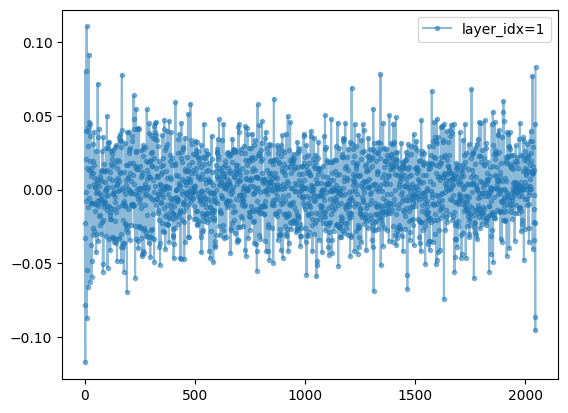

In [54]:
t = 5
overlaps = np.zeros(shape=(embedding_dim))
overlaps_l = np.zeros(shape=(embedding_dim,len(layer_idcs)))

# for n in range(embedding_dim):
  # overlaps[n] = np.dot(embedding_matrix[t],V[:,n])
  # overlaps[n] = V[t,n]
  # for id,layer_idx in enumerate(layer_idcs):
  #   overlaps_l[n,id] = np.dot(V[:,n],
  #                             eigvec_l[:,n,id])


# plt.plot(overlaps,'.-',label=f'embedding',alpha=.5,zorder=len(layer_idcs)+1)
for id,layer_idx in enumerate(layer_idcs):
  plt.plot(overlaps_l[:,id],'.-',label=f'{layer_idx=}',alpha=.5)
plt.legend()
plt.show()

In [7]:
# for i in range(-5,0):
#   plt.plot(eigvec_l[:,i,2])

In [26]:
aux = V.T @ eigvec_l[:,-1,0]

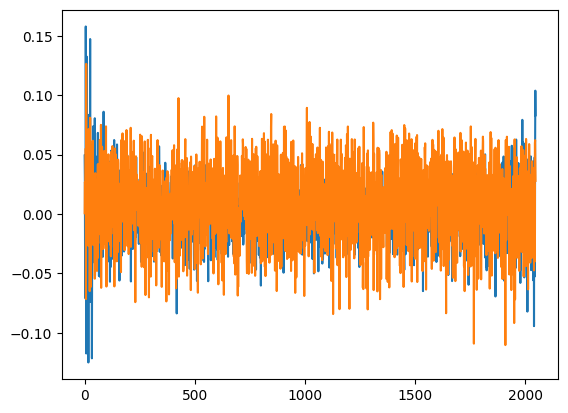

In [27]:
plt.plot(aux)
plt.plot(embedding_matrix[5])

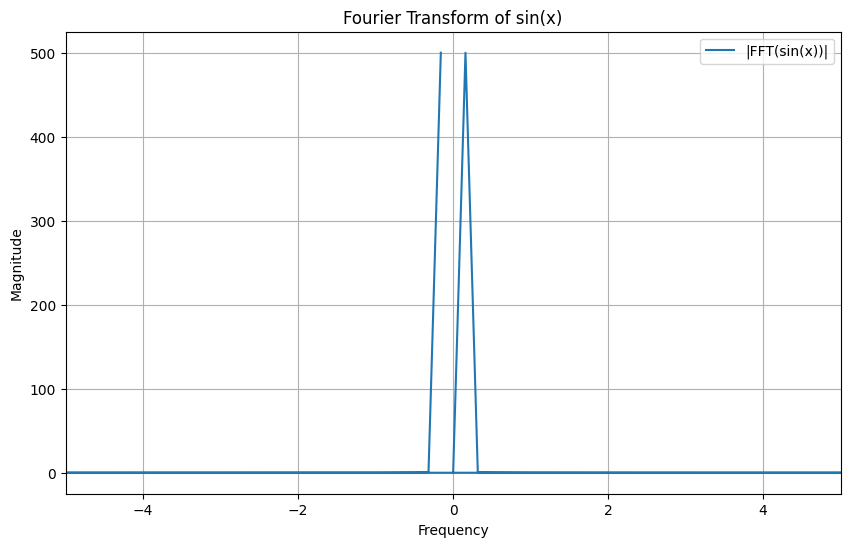

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define the function and sample points
x = np.linspace(0, 2 * np.pi, 1000)  # Interval over one period with many sample points
y = np.sin(x)

# Compute the Fourier Transform
y_fft = fft(y)

# Get frequency components
freqs = fftfreq(len(x), d=(x[1] - x[0]))  # Frequency components with sampling interval

# Plot the Fourier transform (magnitude)
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(y_fft), label="|FFT(sin(x))|")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of sin(x)")
plt.xlim(-5, 5)  # Limit x-axis to view main components
plt.legend()
plt.grid()
plt.show()
